In [1]:
# We will need a factorial and binomial coefficient function for some of the computations today

def factorial(n):
    
    if n < 1:
        return 1
    else:
        return n*factorial(n-1)
    
def binom(m, n):
    
    return factorial(m)/( factorial(m-n)*factorial(n))

# Discrete Random Variables

We start with discrete random variables. First some definitions:

1. What is our definition of a *discrete random variable*?

2. Can a discrete random variable take on infinitely many values? Is there anything that makes us nervous?

3. Give four examples of a **real** (as in real world not real number) discrete random variable:

a. One of which we know the probability distribution of. <br/>
b. One of which takes on infinitely many values. <br/>
c. One of which is uniform?  (what do we mean by uniform?) <br/>
d. One of which your team finds interesting. <br/>

4. What is our definition of the *Probability Distribution* of a discrete random variable?


5. Consider the following discrete random variable:  we roll a fair six-sided die, Y is the number facing up. What is the expected value of Y?

6. Suppose we take the number facing up, Y, and we square it. What is the expected value of $Y^2$?

7. A company in Greeley makes plastic face shields. 1.2% of the time the face shield has a serious flaw and needs to be discarded. Suppose we select 200 face shields at random and let Y be the number with a serious flaw.  What is the expected value of Y?

In [2]:
# I'll do this one here as it illustrates some tricks with Python we will need

P = {}
# It is convenient to build the PDF as a Dictionary so that P[y] is the probability P(Y=y)

for y in range(200+1):
    P[y] = binom(200, y)*0.012**y * (1-0.012)**(200-y) 
# This is an example of a binomial probability distrubtion where the probability of a single successful trial is p.
    
    
sum([ y*P[y] for y in P])
# expected value is then computed by suming over all the values, which Python makes easy using a list generator

2.3999999999999946

In [4]:
# not surprisingly this is:  
0.012 * 200

2.4

8. The expected value gives us the 'center' of the random variable (or a function of it). In addition to knowing the center, we are also interested in how far the result tends to be spread from the center.

Let $\mu = E(Y)$, then we define the *variance* by $ V(Y) = \sigma^2 = E[ (Y-\mu)^2 ] $.  

Note why this makes sense, it captures how far Y moves from its expected value.

Why do we take the square?

9. Find the variance of Y from the six sided die.

10. Find the variance of Y^2 from the six sided die.

11. Find the variance of Y from the face shields.

In [12]:
# I'll do this one here again to illustrate some tricks with Python

mu = sum([ y*P[y] for y in P] )
# let's go ahead and let Python take care of fixing the value of mu

sum( [ (y-mu)**2 * P[y] for y in P] )
# compute the expected value of (y-mu)^2 remember that **2 is ^2 in Python.

0.23711999999999991

12. If Y has units, what are the units of $\mu = E(Y)$ and $\sigma^2 = V(Y)$?

## An Experiement

Are we sure about our computations above?  One of the great things about 2021 is that we can use Python (even on our phones using Google Colab) to check. Essentially, unlike a lot of mathematics classes, we can conduct an experiment in this class to see how close we are.

In [16]:
import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt

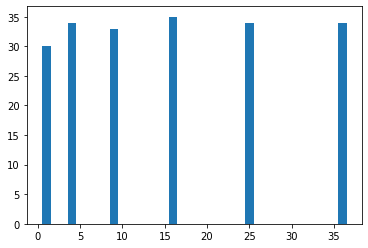

In [25]:
rolls = randint(1, 7, size=200)
sample = [y**2 for y in rolls]
plt.hist(sample, bins=[0.5, 1.5, 3, 3.5, 4.5, 5, 8.5, 9.5, 10, 15.5, 16.5, 17, 24.5, 25.5, 26, 35.5, 36.5]);

In [28]:
np.mean(sample), np.var(sample)

(15.485, 147.81977500000002)

In [30]:
mu = sum(sample)/len(sample)
mu, sum([ (s - mu)**2 for s in sample])/len(sample)

(15.485, 147.81977499999974)

How do these compare with your computed values for the population? Later in class we will come back to exactly what we are doing here (sampling a population and comparing the statistics of the sample to the statistics of the population).